# Test Model

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import numpy as np

## 1. Definie and Load Model

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [66]:
# load model
model = Net()
model.load_state_dict(torch.load('model/model.pt'))

model.eval()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

## 2. Get Image

In [39]:
from PIL import Image
from io import BytesIO

# https://www.cs.toronto.edu/~kriz/cifar.html
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [40]:
d = unpickle('data/cifar-10-batches-py/data_batch_1')

batch label: 114 
label: 9 
filename camion_s_000148.png


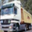

In [47]:
img_idx = 1

array_flat = d[b'data'][img_idx]
array_r = array_flat[0:1024].reshape(32, 32)
array_g = array_flat[1024:2048].reshape(32, 32)
array_b = array_flat[2048:].reshape(32, 32)
array = np.dstack((array_r, array_g, array_b))

fn = d[b'filenames'][img_idx].decode()
label_true = d[b'labels'][img_idx]

print('batch label:',d[b'batch_label'][img_idx],
      '\nlabel:',label_true,
      '\nfilename',fn)

img = Image.fromarray(array)
img

In [48]:
img.save(fn)

## 3. Pass Image to Model

In [65]:
img = Image.open(fn)
transform = transforms.ToTensor()
input_tensor = transform(img)
input_tensor = torch.stack([input_tensor])

pred = model(input_tensor)
_, pred_class = torch.max(pred, 1)
pred_class = int(pred_class[0].numpy())
pred_class

0